In [9]:
# 加载所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [17]:
def initialize():
    state = 2
    clock = 0
    return state,clock

In [50]:
def event(clock,state):
    if state == 2:
        next_repair = clock + 2e10
        next_failure = clock + np.random.exponential(3.5)
    elif state == 1:
        next_repair = clock + np.random.exponential(2.5)
        next_failure = clock + np.random.exponential(3.5)
    else:
        warnings.warn('state异常')
        next_repair = clock + 2e10
        next_failure = clock + 2e10
    return next_repair,next_failure

In [60]:
def routine(state,next_repair,next_failure):
    next_event = min(next_repair,next_failure)
    if next_repair == next_event:
        state += 1
    elif next_failure == next_event:
        state -= 1
    clock = next_event
    return state,clock

In [61]:
def over(state):
    if state == 0:
        return True
    else:
        return False

In [67]:
def simulate():
    state,clock = initialize()
    while not over(state):
        next_repair,next_failure = event(clock,state)
        state,clock = routine(state,next_repair,next_failure)
    return clock

In [74]:
if __name__ == '__main__':
    np.random.seed(1)
    result = list()
    for i in range(1000):
        result.append(simulate())
    result = np.array(result)

(array([452., 257., 162.,  65.,  33.,  16.,   5.,   5.,   4.,   1.]),
 array([ 0.10659795,  7.5464696 , 14.98634126, 22.42621291, 29.86608456,
        37.30595621, 44.74582787, 52.18569952, 59.62557117, 67.06544282,
        74.50531448]),
 <BarContainer object of 10 artists>)

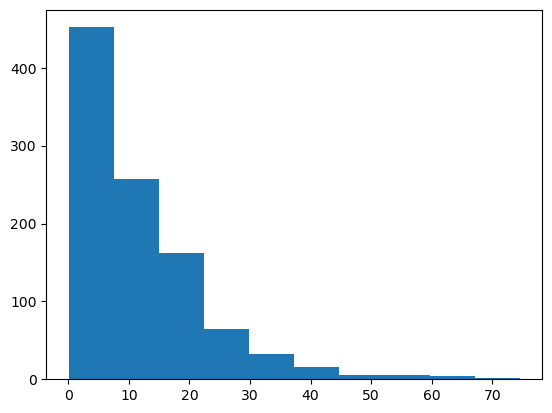

In [85]:
plt.hist(result)

In [87]:
print('均值',np.mean(result),'标准差',np.std(result))

均值 11.826628599297651 标准差 10.593004688124383


In [88]:
p = sum(result<5)/1000
print('均值',p,'标准差',p*(1-p))

均值 0.292 标准差 0.20673599999999998
